In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


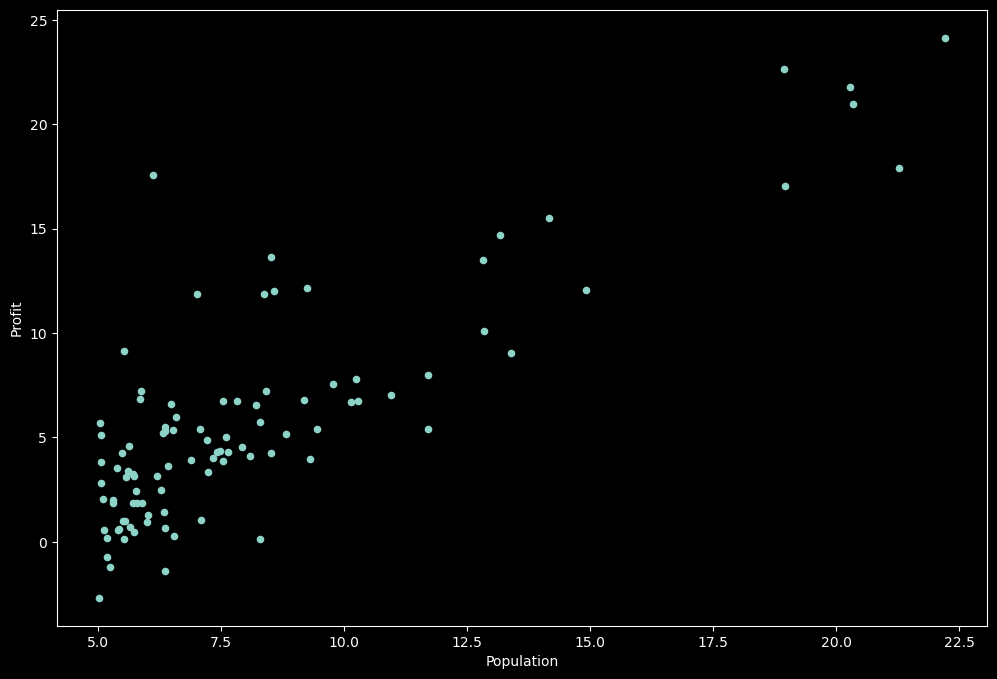

In [4]:
data.plot(kind='scatter', x='Population', y = 'Profit', figsize=(12, 8))
plt.show()

In [5]:
def computeCost(X, y, theta):
    inner = np.power(X * theta.T - y, 2)
    return np.sum(inner / (2 * len(X)))

In [6]:
data.insert(0, 'Ones', 1)

In [7]:
cols = data.shape[1]
X = data.iloc[:, 0:cols - 1]
y = data.iloc[:, cols - 1:cols]

In [8]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [10]:
X

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598
...,...,...
92,1,5.8707
93,1,5.3054
94,1,8.2934
95,1,13.3940


In [11]:
y

,Profit
0,17.59200
1,9.13020
2,13.66200
3,11.85400
4,6.82330
...,...
92,7.20290
93,1.98690
94,0.14454
95,9.05510


In [13]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0]))

In [14]:
X

matrix([[ 1.    ,  6.1101],
        [ 1.    ,  5.5277],
        [ 1.    ,  8.5186],
        [ 1.    ,  7.0032],
        [ 1.    ,  5.8598],
        [ 1.    ,  8.3829],
        [ 1.    ,  7.4764],
        [ 1.    ,  8.5781],
        [ 1.    ,  6.4862],
        [ 1.    ,  5.0546],
        [ 1.    ,  5.7107],
        [ 1.    , 14.164 ],
        [ 1.    ,  5.734 ],
        [ 1.    ,  8.4084],
        [ 1.    ,  5.6407],
        [ 1.    ,  5.3794],
        [ 1.    ,  6.3654],
        [ 1.    ,  5.1301],
        [ 1.    ,  6.4296],
        [ 1.    ,  7.0708],
        [ 1.    ,  6.1891],
        [ 1.    , 20.27  ],
        [ 1.    ,  5.4901],
        [ 1.    ,  6.3261],
        [ 1.    ,  5.5649],
        [ 1.    , 18.945 ],
        [ 1.    , 12.828 ],
        [ 1.    , 10.957 ],
        [ 1.    , 13.176 ],
        [ 1.    , 22.203 ],
        [ 1.    ,  5.2524],
        [ 1.    ,  6.5894],
        [ 1.    ,  9.2482],
        [ 1.    ,  5.8918],
        [ 1.    ,  8.2111],
        [ 1.    ,  7

In [15]:
y

matrix([[17.592  ],
        [ 9.1302 ],
        [13.662  ],
        [11.854  ],
        [ 6.8233 ],
        [11.886  ],
        [ 4.3483 ],
        [12.     ],
        [ 6.5987 ],
        [ 3.8166 ],
        [ 3.2522 ],
        [15.505  ],
        [ 3.1551 ],
        [ 7.2258 ],
        [ 0.71618],
        [ 3.5129 ],
        [ 5.3048 ],
        [ 0.56077],
        [ 3.6518 ],
        [ 5.3893 ],
        [ 3.1386 ],
        [21.767  ],
        [ 4.263  ],
        [ 5.1875 ],
        [ 3.0825 ],
        [22.638  ],
        [13.501  ],
        [ 7.0467 ],
        [14.692  ],
        [24.147  ],
        [-1.22   ],
        [ 5.9966 ],
        [12.134  ],
        [ 1.8495 ],
        [ 6.5426 ],
        [ 4.5623 ],
        [ 4.1164 ],
        [ 3.3928 ],
        [10.117  ],
        [ 5.4974 ],
        [ 0.55657],
        [ 3.9115 ],
        [ 5.3854 ],
        [ 2.4406 ],
        [ 6.7318 ],
        [ 1.0463 ],
        [ 5.1337 ],
        [ 1.844  ],
        [ 8.0043 ],
        [ 1.0179 ],


In [16]:
theta

matrix([[0, 0]])

In [17]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [18]:
computeCost(X, y, theta)

32.072733877455676

In [32]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = theta[0, j] - alpha / len(X) * np.sum(term)
        
        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [50]:
alpha = 0.01
iters = 1000

In [51]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [52]:
cost

array([6.73719046, 5.93159357, 5.90115471, 5.89522859, 5.89009494,
       5.88500416, 5.87993248, 5.87487909, 5.86984391, 5.86482687,
       5.85982789, 5.85484692, 5.84988389, 5.84493874, 5.8400114 ,
       5.83510181, 5.8302099 , 5.82533562, 5.82047889, 5.81563965,
       5.81081784, 5.8060134 , 5.80122627, 5.79645638, 5.79170367,
       5.78696808, 5.78224955, 5.77754801, 5.77286341, 5.76819568,
       5.76354477, 5.75891061, 5.75429313, 5.7496923 , 5.74510803,
       5.74054027, 5.73598897, 5.73145406, 5.72693549, 5.72243319,
       5.71794711, 5.71347718, 5.70902336, 5.70458558, 5.70016379,
       5.69575792, 5.69136792, 5.68699373, 5.6826353 , 5.67829257,
       5.67396548, 5.66965398, 5.665358  , 5.6610775 , 5.65681242,
       5.6525627 , 5.64832829, 5.64410913, 5.63990517, 5.63571635,
       5.63154261, 5.62738391, 5.6232402 , 5.6191114 , 5.61499748,
       5.61089837, 5.60681403, 5.60274441, 5.59868944, 5.59464907,
       5.59062326, 5.58661195, 5.58261509, 5.57863263, 5.57466

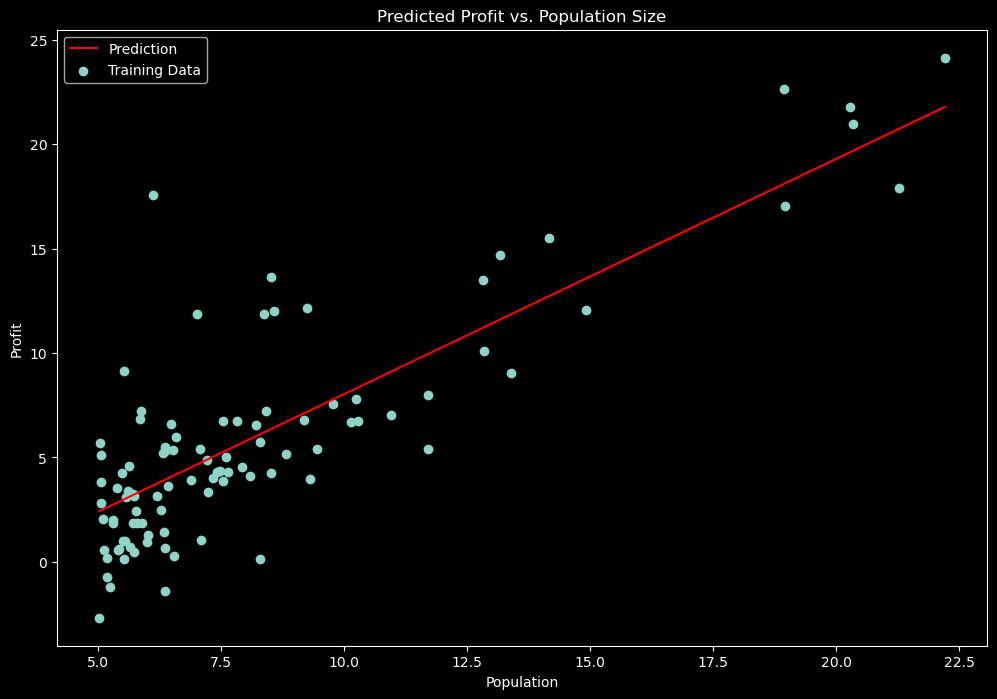

In [53]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + g[0, 1] * x

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

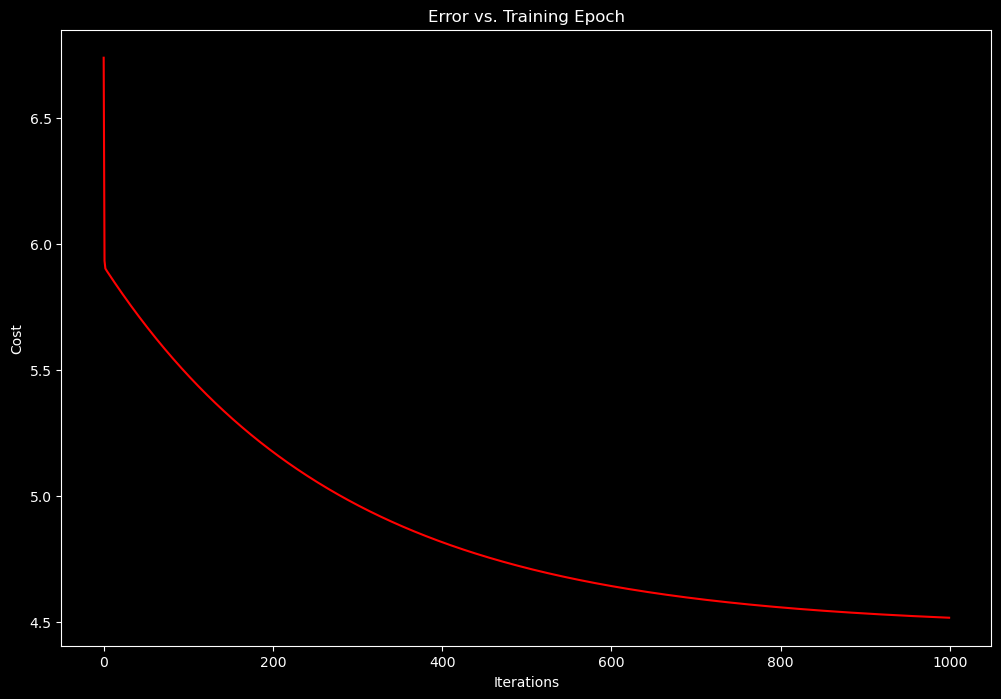

In [54]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [55]:
path = 'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [56]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [57]:
data2.insert(0, 'Ones', 1)

cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols - 1]
y2 = data2.iloc[:, cols - 1:cols]

X2= np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0, 0, 0]))

g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

computeCost(X2, y2, g2)

0.13070336960771892

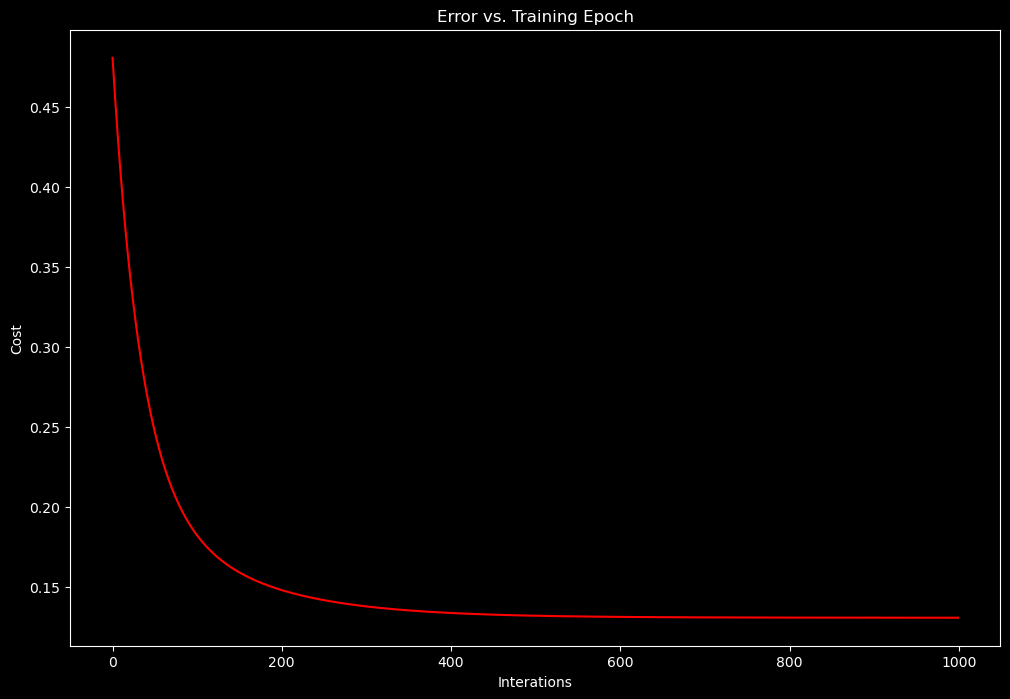

In [58]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Interations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()